In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow import keras


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('PruebaTG_v2.xlsx')

In [ ]:

df = df.drop(0)
df = df.reset_index(drop= True)

In [ ]:
dups = df.pivot_table(index = ['Diagnosis'], aggfunc ='size') 
  
print(dups) 

Diagnosis
diabetes       668
healthy        441
intolerance    865
dtype: int64


In [ ]:
#sano 0, intolerate a la glucosa = 1, prediabetes 2, diabetes = 3

df['Diagnosis'] = df['Diagnosis'].replace({'healthy' : 0}, regex=True)

In [ ]:
df['Diagnosis'] = df['Diagnosis'].replace({'prediabetes' : 2}, regex=True)

In [ ]:
df['Diagnosis'] = df['Diagnosis'].replace({'intolerance' : 1}, regex=True)


In [ ]:
df['Diagnosis'] = df['Diagnosis'].replace({'diabetes' : 2}, regex=True)


In [ ]:
from sklearn.model_selection import train_test_split 

train, test = train_test_split(df, test_size = 0.30, random_state = 100)

print("Examples used for training: ", len(train))
print("Examples used for test: ", len(test))

Examples used for training:  1381
Examples used for test:  593


In [ ]:
#patients = df.drop(["Paciente","Edad","Diagnostico","Basal"], axis=1)
patients = df.drop(["Patient","age","Basal",'Diagnosis'], axis=1)
p_train = train.drop(["Patient","age","Basal",'Diagnosis'], axis=1)
p_test = test.drop(["Patient","age","Basal",'Diagnosis'], axis=1)
#patients = patients.drop(0)
p_train.head(5)

,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,...,Unnamed: 294,Unnamed: 295,Unnamed: 296,Unnamed: 297,Unnamed: 298,Unnamed: 299,Unnamed: 300,Unnamed: 301,Unnamed: 302,Unnamed: 303
545,70.013398,70.099281,70.310719,70.683925,71.242275,71.998571,72.959478,74.124148,75.486303,77.039402,...,113.144839,112.855551,112.568042,112.282307,111.998337,111.716125,111.435664,111.156945,110.879959,110.604700
1286,99.326902,98.643168,98.049814,97.567919,97.213219,96.996921,96.926422,97.005887,97.236775,97.618391,...,132.713109,132.452772,132.194010,131.936818,131.681190,131.427120,131.174602,130.923631,130.674201,130.426308
438,69.569336,69.162807,68.856940,68.668936,68.607480,68.675065,68.869861,69.186851,69.619011,70.158178,...,91.607970,91.476853,91.346337,91.216420,91.087100,90.958376,90.830246,90.702707,90.575758,90.449397
1202,100.001976,100.014997,100.048060,100.108305,100.201347,100.331566,100.502297,100.716048,100.974581,101.279121,...,137.890610,137.620184,137.351102,137.083366,136.816978,136.551939,136.288252,136.025917,135.764937,135.505311
949,88.904965,87.942021,87.276298,86.898256,86.781386,86.895307,87.210217,87.700239,88.342159,89.116041,...,148.575320,148.236815,147.899187,147.562490,147.226851,146.892187,146.558443,146.225671,145.893947,145.563210


<hr>

In [ ]:
s = patients.shape
s[1]
x = [i for i in range(0,s[1],30)]
x


[0, 30, 60, 90, 120, 150, 180, 210, 240, 270]

In [ ]:
a = [patients.iloc[:,i] for i in range(0,s[1],30)]
x_test = [p_test.iloc[:,i] for i in range(0,s[1],30)]
x_train = [p_train.iloc[:,i] for i in range(0,s[1],30)]
a = np.array(a).T
x_train = np.array(x_train).T
x_test = np.array(x_test).T

x_test.shape


(593, 10)

In [ ]:
labels = df[['Diagnosis']]
labels_train = train[['Diagnosis']]
labels_test = test[['Diagnosis']]
#labels = labels.drop(0)
labels_train.head(20)

,Diagnosis
545,1
1286,2
438,0
1202,1
949,1
533,1
1293,1
64,1
202,2
480,2


<hr>

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
#a = np.zeros((len(labels), 300))

In [ ]:
y_train = labels_train.to_numpy()
y_test = labels_test.to_numpy()

In [ ]:
y_train = keras.utils.to_categorical(y_train, 3)
y_test = keras.utils.to_categorical(y_test, 3)

In [ ]:
y_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
a
l = labels.to_numpy()


In [ ]:
a.shape

(1974, 10)

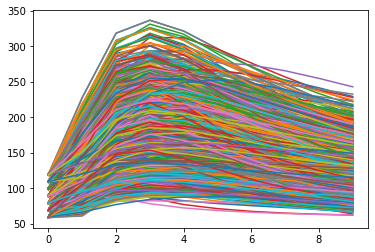

In [ ]:
for i in range(0, len(y_train)):
  plt.plot(x_train[i,:])
plt.show()

In [ ]:
#a = a.reshape(a.shape[0], 10, 1)
l=labels.to_numpy()
#l = l.reshape(a.shape[0], 3, 1)
len(np.unique(l))

3

In [ ]:
x

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270]

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
x_train.shape

(1381, 10, 1)

#Normalize

<hr>

In [ ]:
#a = a.reshape(a.shape[0], 300, 1)
#l=labels.to_numpy()
#l = l.reshape(a.shape[0], 3, 1)
#a.shape

# LSTM clasification


# <a name="4"></a> 4. LSTM Model - Batch Training and Predictiction
-------------------------

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(a , l, test_size=0.25, random_state=42)
X_train=x_train
#y_train =
X_test=x_test
#y_test=

In [ ]:
epochs = 1000
emb_dim = 282 #128
batch_size = 256
labels[:2]
n_most_common_words = X_train.shape[0]

In [ ]:
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=10))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
#model.add(Dense(100, activation='sigmoid'))
#model.add(Dense(50, activation='tanh'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

#history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

((1381, 10, 1), (1381, 3), (593, 10, 1), (593, 3))
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 282)           389442    
                                                                 
 spatial_dropout1d (SpatialD  (None, 10, 282)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                88832     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 478,469
Trainable params: 478,469
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
6/6 [==============================] - 5s 113ms

In [ ]:
predict = model.predict(X_test)

19/19 [==============================] - 1s 6ms/step


In [ ]:
p = predict.round()

print(p[0:3],y_test[0:3])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]] [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

19/19 [==============================] - 1s 5ms/step - loss: 0.3173 - acc: 0.9612
Test set
  Loss: 0.317
  Accuracy: 0.961



#Assessment

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#y_pred = np.argmax(p, axis=-1)
y_pred = np.argmax(predict, axis=-1)
y_true=np.argmax(y_test, axis=-1)

In [ ]:
# Compute ROC curve and ROC area for each class
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], p[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), p.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

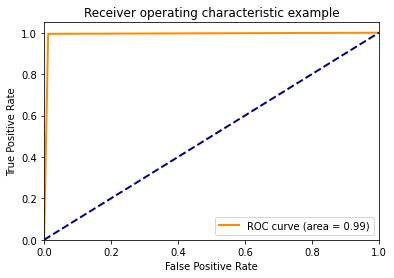

In [ ]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

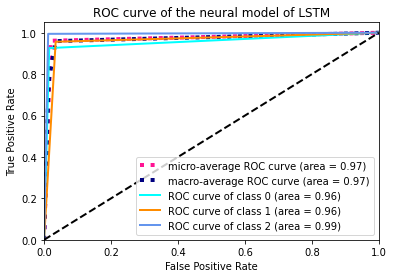

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(0,n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve of the neural model of LSTM")
plt.legend(loc="lower right")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = np.argmax(p, axis=-1)
y_true=np.argmax(y_test, axis=-1)



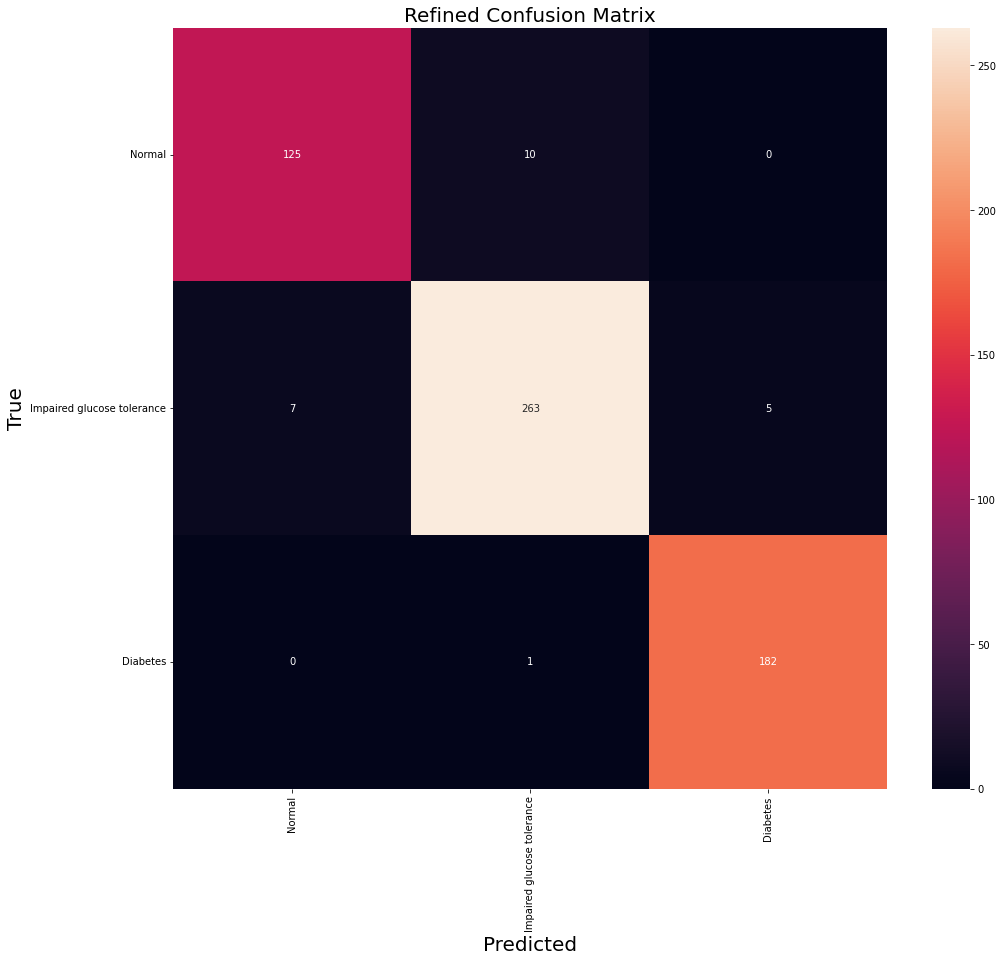

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

## Get Class Labels
#labels = le.classes_
class_names = ['Normal','Impaired glucose tolerance','Diabetes']

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

In [ ]:
cm

array([[125,  10,   0],
       [  7, 263,   5],
       [  0,   1, 182]])

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_true, y_pred )
# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_true, y_pred, average=None)
# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_true, y_pred, average=None)

In [ ]:
# Method 1: sklearn
from sklearn.metrics import f1_score
f1 =f1_score(y_true, y_pred, average=None)

In [ ]:
print(ac,recall,precision,f1)

0.9612141652613828 [0.92592593 0.95636364 0.99453552] [0.9469697  0.95985401 0.97326203] [0.93632959 0.95810565 0.98378378]



#Test with real data

##healthy 0, glucose intolerance = 1, diabetes = 2

In [ ]:
import numpy as np
patient_test = np.array(([ 82., 155.,  141. , 103. ,  96. ,  89. ,  89. , 89. ,  89., 89. ],
                         [ 82.,   118.,  140. , 148., 147.,  146.,  146.,  146.,  146., 146. ],
                         [ 92. , 133.,  72. , 87., 92.,  92. , 92., 92., 92., 92.],
                         [ 157. , 185.,  232. , 216., 197.,  192. , 192., 192., 192., 192.],
                         [ 70, 70, 148, 148, 116, 97, 97, 97, 97, 97 ] ,
                         [ 79, 79, 157, 157, 116, 84, 84, 84, 84, 84 ],
                         [ 82, 82, 94, 94, 102, 102, 102, 102, 102, 102 ] ,
                         [ 95, 95, 180, 180, 155, 155, 140, 140, 140, 140 ],
                         [ 84, 84, 84, 84, 164, 164, 164, 164, 164, 164 ],
                         [ 73, 73, 99, 99, 82, 82, 82, 82, 82, 82 ] , 
                         [ 61, 61, 94, 94, 90, 90, 90, 90, 90, 90 ],
                         [ 100, 100, 100, 100, 149, 149, 149, 149, 149, 149 ],
                         [ 63, 63, 63, 63, 87, 87, 87, 87, 87, 87 ] ,
                         [ 75, 75, 75, 75, 91, 91, 91, 91, 91, 91 ], 
                         [ 117, 117, 145, 145, 98, 98, 98, 98, 98, 98 ],
                         [ 120, 120, 120, 120, 136, 136, 136,136, 136, 136 ]
                         ))
patient_test.shape

(16, 10)

In [ ]:
y_pred = np.argmax(predict, axis=-1)
y_pred 

array([0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1])

In [ ]:
label = [0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1]

In [ ]:
predict = model.predict(patient_test)
print (predict)

1/1 [==============================] - 0s 34ms/step
[[7.67878950e-01 2.32110411e-01 1.06263742e-05]
 [2.58886234e-06 9.99997199e-01 9.06277009e-08]
 [9.99998629e-01 1.30458102e-06 5.14854470e-08]
 [1.87670409e-07 4.60206905e-07 9.99999344e-01]
 [9.99996245e-01 3.67529947e-06 1.84986408e-08]
 [8.84419739e-01 1.15035780e-01 5.44446870e-04]
 [9.98914301e-01 1.08468032e-03 9.34771037e-07]
 [7.78568960e-08 9.99999583e-01 2.73631912e-07]
 [2.06517370e-06 9.99984205e-01 1.37452516e-05]
 [9.31952477e-01 6.51239157e-02 2.92351563e-03]
 [9.99998033e-01 1.81673317e-06 1.10771666e-07]
 [9.70054188e-08 9.99999583e-01 2.21335554e-07]
 [9.99999583e-01 4.14017876e-07 1.43160799e-08]
 [9.99840021e-01 1.58473616e-04 1.44433102e-06]
 [9.22667205e-01 7.73255825e-02 7.13796589e-06]
 [2.04522038e-07 9.99999702e-01 9.21979204e-09]]


In [ ]:

# Method 1: sklearn
from sklearn.metrics import f1_score
f1 =f1_score(label, y_pred, average=None)

In [ ]:
print(ac,recall,precision,f1)

0.9612141652613828 [0.92592593 0.95636364 0.99453552] [0.9469697  0.95985401 0.97326203] [0.94736842 0.90909091 1.        ]
